In [1]:
import numpy as np
import numpy.ma as ma
import matplotlib.pyplot as plt
from astropy.io import fits
from astropy.stats import sigma_clipped_stats

%matplotlib inline

file_path = '../ngc1087/hlsp_phangs-hst_hst_wfc3-uvis_ngc1087_f555w_v1_exp-drc-sci.fits'

In [2]:
img=fits.open(file_path)
img.info()

Filename: ../ngc1087/hlsp_phangs-hst_hst_wfc3-uvis_ngc1087_f555w_v1_exp-drc-sci.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     942   (8000, 8000)   float32   
  1  HDRTAB        1 BinTableHDU    557   6R x 274C   [9A, 3A, K, D, D, D, D, D, D, D, D, D, D, D, D, K, 8A, 9A, 7A, 18A, 4A, D, D, D, D, 3A, D, D, D, D, D, D, D, D, D, D, D, D, K, K, 8A, 23A, D, D, D, D, K, K, 8A, 23A, 9A, 18A, 4A, K, D, D, D, K, K, K, K, 23A, D, D, D, D, K, K, 4A, 3A, 4A, L, D, D, D, 23A, 1A, K, D, D, D, 4A, 1A, 12A, 12A, 8A, 23A, D, D, 10A, 10A, D, D, D, 4A, 3A, 3A, 4A, 8A, 7A, D, K, D, 6A, 9A, 8A, D, D, 4A, 18A, 3A, K, 5A, 3A, D, 10A, 8A, 8A, 23A, D, D, D, 3A, 1A, D, 23A, D, D, D, 3A, L, 1A, 4A, D, 3A, 6A, D, D, D, D, D, 23A, D, D, D, D, D, 1A, K, K, K, K, D, 3A, K, D, 5A, 7A, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, D, 13A, D, 24A, 23A, D, 1A, 1A, D, K, D, D, 1A, 1A, D, D, D, D, D, D, D, D, D, D, D, 4A, D, K, 23A, D, 8A, D, D, 20A, D, D, L, D, D,

In [3]:
fits_data=img[0].data[1000:7000,1000:7000]
fits_data.shape, fits_data.dtype

((6000, 6000), dtype('>f4'))

In [4]:
mean, median, std = sigma_clipped_stats(fits_data)
mean, median, std

(-0.0013413406, 0.0, 0.00995229)

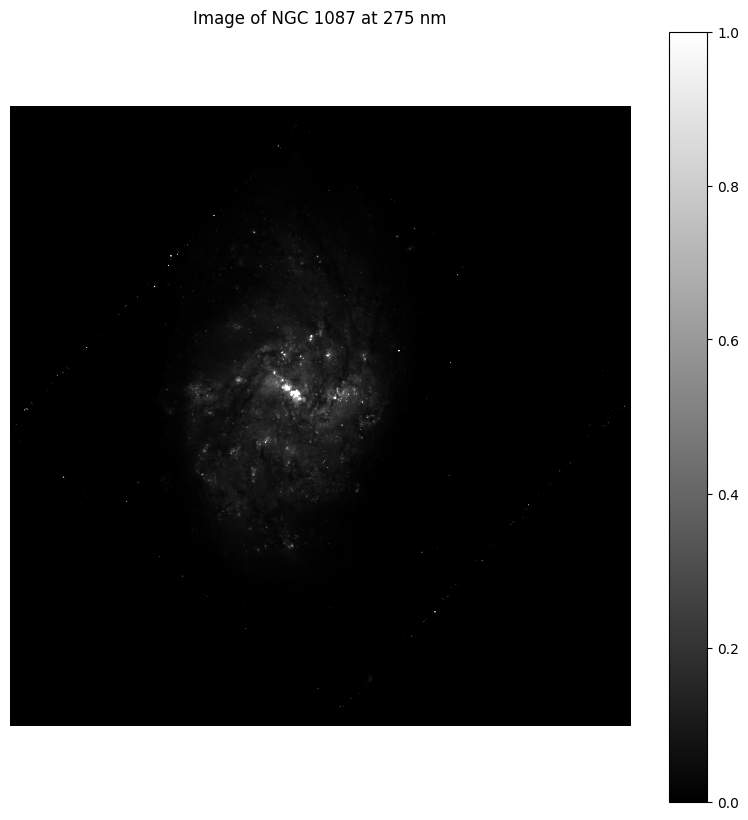

In [5]:
plt.figure(figsize=(10,10))

plt.imshow(fits_data, vmin = 0, vmax = 1, cmap='gray')
plt.title('Image of NGC 1087 at 275 nm')
plt.colorbar()
plt.axis('equal')
plt.axis('off')
plt.show()

In [6]:
masked_fits_data = ma.masked_equal(fits_data, 0)

mean, median, std = sigma_clipped_stats(masked_fits_data)
mean, median, std

(0.004910671, -0.001754278, 0.026369743)

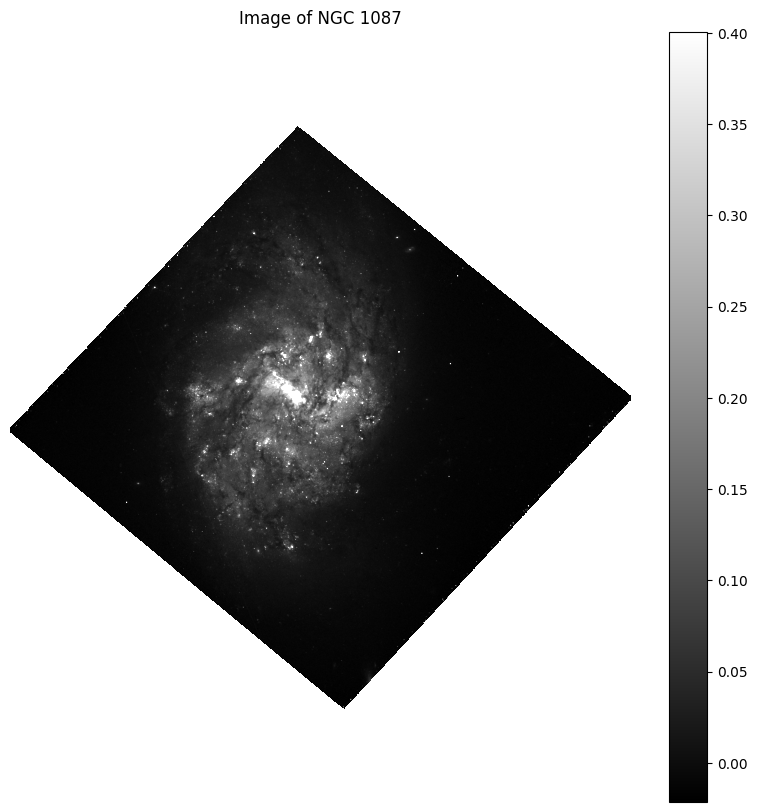

In [7]:
plt.figure(figsize=(10,10))
plt.imshow(masked_fits_data, vmin = mean-std, vmax = mean+15*std, cmap='gray')
plt.title('Image of NGC 1087')
plt.colorbar()
plt.axis('equal')
plt.axis('off')
plt.show()